In [181]:
import pandas as pd

In [182]:
dataframe=pd.read_csv('FINAL.csv')

In [183]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279724 entries, 0 to 279723
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            279724 non-null  int64  
 1   id_student            279724 non-null  int64  
 2   sum_click             279724 non-null  int64  
 3   overallstay           279724 non-null  float64
 4   id_assessment         279724 non-null  int64  
 5   date_submitted        279724 non-null  int64  
 6   score                 279370 non-null  float64
 7   RS20                  256309 non-null  float64
 8   RS40                  273243 non-null  float64
 9   RS60                  277178 non-null  float64
 10  RS80                  277211 non-null  float64
 11  RS100                 279702 non-null  float64
 12  gender                279724 non-null  object 
 13  region                279724 non-null  object 
 14  highest_education     279724 non-null  object 
 15  

In [184]:
dataframe=dataframe.drop('Unnamed: 0',axis=1)

In [185]:
dataframe.isnull().sum()

id_student                  0
sum_click                   0
overallstay                 0
id_assessment               0
date_submitted              0
score                     354
RS20                    23415
RS40                     6481
RS60                     2546
RS80                     2513
RS100                      22
gender                      0
region                      0
highest_education           0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
LS20                        0
LS40                        0
LS60                        0
LS80                        0
LS100                       0
dtype: int64

In [186]:
dataframe.isnull().mean()

id_student              0.000000
sum_click               0.000000
overallstay             0.000000
id_assessment           0.000000
date_submitted          0.000000
score                   0.001266
RS20                    0.083708
RS40                    0.023169
RS60                    0.009102
RS80                    0.008984
RS100                   0.000079
gender                  0.000000
region                  0.000000
highest_education       0.000000
num_of_prev_attempts    0.000000
studied_credits         0.000000
disability              0.000000
final_result            0.000000
LS20                    0.000000
LS40                    0.000000
LS60                    0.000000
LS80                    0.000000
LS100                   0.000000
dtype: float64

In [187]:
predicted_score = dataframe.loc[:, ['sum_click', 'overallstay', 'date_submitted', 'studied_credits', 
                                    'LS20', 'LS40', 'LS60', 'LS80', 'LS100', 
                                    'RS20', 'RS40', 'RS60','RS80','RS100', 'score']]
predicted_score


,sum_click,overallstay,date_submitted,studied_credits,LS20,LS40,LS60,LS80,LS100,RS20,RS40,RS60,RS80,RS100,score
0,2791,321.0,17,60,4,3,2,1,0,60.0,54.0,57.000000,58.00,61.8,60.0
1,2791,321.0,51,60,4,3,2,1,0,60.0,54.0,57.000000,58.00,61.8,48.0
2,2791,321.0,116,60,4,3,2,1,0,60.0,54.0,57.000000,58.00,61.8,63.0
3,2791,321.0,164,60,4,3,2,1,0,60.0,54.0,57.000000,58.00,61.8,61.0
4,2791,321.0,210,60,4,3,2,1,0,60.0,54.0,57.000000,58.00,61.8,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279719,605,266.0,18,120,4,3,2,1,1,100.0,92.5,90.666667,91.75,92.4,100.0
279720,605,266.0,53,120,4,3,2,1,1,100.0,92.5,90.666667,91.75,92.4,85.0
279721,605,266.0,109,120,4,3,2,1,1,100.0,92.5,90.666667,91.75,92.4,87.0
279722,605,266.0,152,120,4,3,2,1,1,100.0,92.5,90.666667,91.75,92.4,95.0


In [188]:
cols = [var for var in predicted_score.columns if predicted_score[var].isnull().mean() < 0.05 and predicted_score[var].isnull().mean() > 0]
cols

['RS40', 'RS60', 'RS80', 'RS100', 'score']

In [189]:
predicted_score[cols].sample(5)

,RS40,RS60,RS80,RS100,score
73299,61.000000,68.500000,70.800000,62.000000,60.0
43287,85.166667,82.444444,81.583333,80.687500,87.0
16835,90.500000,92.714286,92.888889,92.250000,90.0
105059,51.750000,51.833333,53.750000,47.272727,33.0
155864,89.500000,85.666667,85.666667,84.750000,84.0


In [190]:
pip install matplotlib

C:\Users\jaina\AppData\Local\Temp\ipykernel_23632\242948306.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


Text(0, 0.5, 'Density')

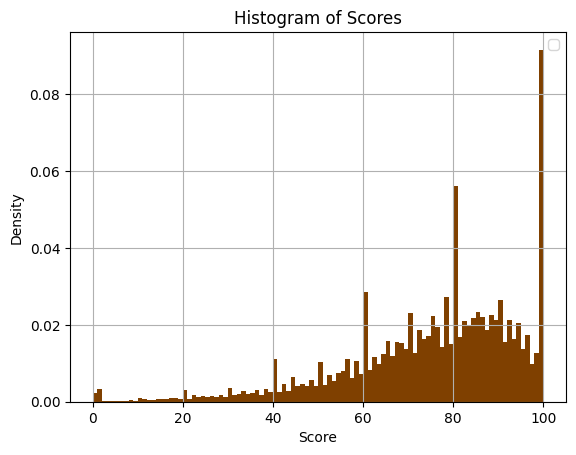

In [191]:
fig=plt.figure()
ax=fig.add_subplot(111)

#originaldata
predicted_score['score'].hist(bins=100,ax=ax,density=True,color='red')
#datframe after cca 
new_predicted['score'].hist(bins=100,density=True,ax=ax,color='green',alpha=0.5)

ax.legend()
ax.set_title('Histogram of Scores')
ax.set_xlabel('Score')
ax.set_ylabel('Density')

In [192]:
median_value

np.float64(79.0)

In [193]:

# Step 2: Fill null values with the median
dataframe['score'] = dataframe['score'].fillna(median_value)


In [194]:
dataframe.isnull().sum()

id_student                  0
sum_click                   0
overallstay                 0
id_assessment               0
date_submitted              0
score                       0
RS20                    23415
RS40                     6481
RS60                     2546
RS80                     2513
RS100                      22
gender                      0
region                      0
highest_education           0
num_of_prev_attempts        0
studied_credits             0
disability                  0
final_result                0
LS20                        0
LS40                        0
LS60                        0
LS80                        0
LS100                       0
dtype: int64

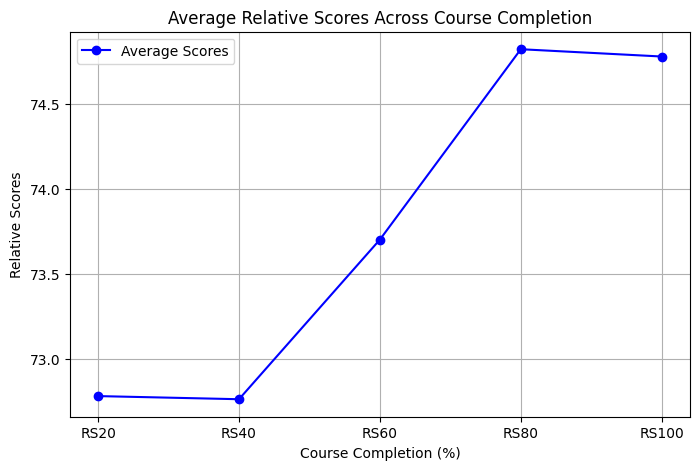

In [195]:
import matplotlib.pyplot as plt

# Define the RS columns
rs_columns = ['RS20', 'RS40', 'RS60', 'RS80', 'RS100']

# Calculate average scores for each RS column
average_scores = dataframe[rs_columns].mean()

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(rs_columns, average_scores, marker='o', color='blue', label='Average Scores')
plt.title('Average Relative Scores Across Course Completion')
plt.xlabel('Course Completion (%)')
plt.ylabel('Relative Scores')
plt.grid()
plt.legend()
plt.show()


In [196]:
for col in rs_columns:
    dataframe[col] = dataframe[col].fillna(dataframe[col].median())


In [197]:
dataframe.isnull().sum()

id_student              0
sum_click               0
overallstay             0
id_assessment           0
date_submitted          0
score                   0
RS20                    0
RS40                    0
RS60                    0
RS80                    0
RS100                   0
gender                  0
region                  0
highest_education       0
num_of_prev_attempts    0
studied_credits         0
disability              0
final_result            0
LS20                    0
LS40                    0
LS60                    0
LS80                    0
LS100                   0
dtype: int64

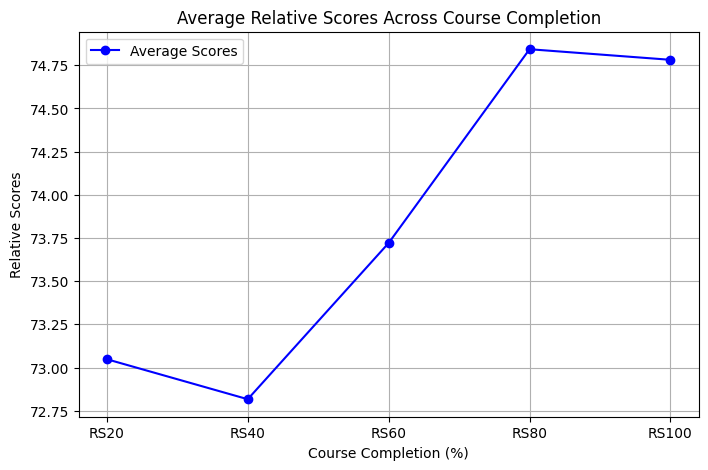

In [198]:
import matplotlib.pyplot as plt

# Define the RS columns
rs_columns = ['RS20', 'RS40', 'RS60', 'RS80', 'RS100']

# Calculate average scores for each RS column
average_scores = dataframe[rs_columns].mean()

# Plot the line chart
plt.figure(figsize=(8, 5))
plt.plot(rs_columns, average_scores, marker='o', color='blue', label='Average Scores')
plt.title('Average Relative Scores Across Course Completion')
plt.xlabel('Course Completion (%)')
plt.ylabel('Relative Scores')
plt.grid()
plt.legend()
plt.show()

In [199]:
dataframe

,id_student,sum_click,overallstay,id_assessment,date_submitted,score,RS20,RS40,RS60,RS80,...,highest_education,num_of_prev_attempts,studied_credits,disability,final_result,LS20,LS40,LS60,LS80,LS100
0,6516,2791,321.0,1758,17,60.0,60.0,54.0,57.000000,58.00,...,HE Qualification,0,60,N,Pass,4,3,2,1,0
1,6516,2791,321.0,1759,51,48.0,60.0,54.0,57.000000,58.00,...,HE Qualification,0,60,N,Pass,4,3,2,1,0
2,6516,2791,321.0,1760,116,63.0,60.0,54.0,57.000000,58.00,...,HE Qualification,0,60,N,Pass,4,3,2,1,0
3,6516,2791,321.0,1761,164,61.0,60.0,54.0,57.000000,58.00,...,HE Qualification,0,60,N,Pass,4,3,2,1,0
4,6516,2791,321.0,1762,210,77.0,60.0,54.0,57.000000,58.00,...,HE Qualification,0,60,N,Pass,4,3,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279719,2698588,605,266.0,15020,18,100.0,100.0,92.5,90.666667,91.75,...,HE Qualification,0,120,N,Distinction,4,3,2,1,1
279720,2698588,605,266.0,15021,53,85.0,100.0,92.5,90.666667,91.75,...,HE Qualification,0,120,N,Distinction,4,3,2,1,1
279721,2698588,605,266.0,15022,109,87.0,100.0,92.5,90.666667,91.75,...,HE Qualification,0,120,N,Distinction,4,3,2,1,1
279722,2698588,605,266.0,15023,152,95.0,100.0,92.5,90.666667,91.75,...,HE Qualification,0,120,N,Distinction,4,3,2,1,1


In [214]:
dataframe[dataframe['score'] > 100]

,id_student,sum_click,overallstay,id_assessment,date_submitted,score,RS20,RS40,RS60,RS80,...,highest_education,num_of_prev_attempts,studied_credits,disability,final_result,LS20,LS40,LS60,LS80,LS100


<Axes: >

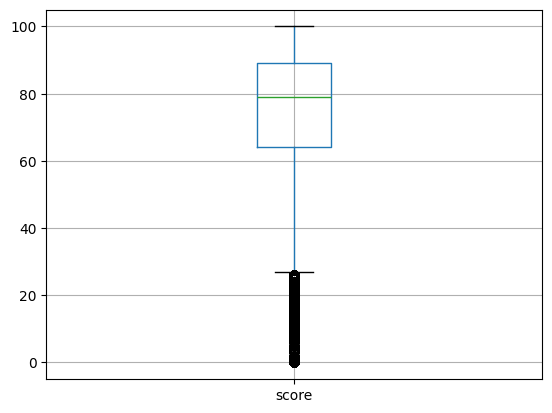

In [200]:
dataframe[['score']].boxplot()

In [201]:

dataframe['score'].dtypes

dtype('float64')

In [202]:
#z-score
upper_limit = dataframe['score'].mean() + 3 * dataframe['score'].std()
lower_limit = dataframe['score'].mean() - 3 * dataframe['score'].std()


In [203]:
upper_limit,lower_limit

(np.float64(133.22065557769648), np.float64(16.381652411607263))

In [210]:
outlierdata=dataframe.loc[(dataframe['score']>upper_limit) | (dataframe['score']<lower_limit)]
outlierdata.sample(10)

,id_student,sum_click,overallstay,id_assessment,date_submitted,score,RS20,RS40,RS60,RS80,...,highest_education,num_of_prev_attempts,studied_credits,disability,final_result,LS20,LS40,LS60,LS80,LS100
152163,593787,877,266.0,24282,36,4.0,4.000000,25.000000,30.666667,28.750000,...,Lower Than A Level,0,60,N,Fail,4,3,2,1,0
52001,465764,1783,154.0,24295,21,0.0,39.000000,67.000000,63.000000,63.181818,...,Lower Than A Level,0,60,Y,Pass,10,8,6,3,0
236875,680222,352,93.0,24295,21,0.0,76.000000,75.200000,0.000000,0.000000,...,Lower Than A Level,0,180,N,Withdrawn,0,0,0,0,0
161112,599263,653,364.0,24284,159,11.0,46.000000,25.000000,41.000000,45.142857,...,A Level or Equivalent,0,120,N,Withdrawn,7,5,3,0,0
29470,336218,335,350.0,25367,195,8.0,60.000000,50.000000,42.666667,41.250000,...,Lower Than A Level,0,60,N,Fail,5,3,3,1,0
207842,630900,5608,263.0,25367,194,11.0,70.000000,70.500000,55.500000,62.000000,...,A Level or Equivalent,0,60,N,Pass,9,7,5,3,1
48021,434476,21204,145.0,34862,114,0.0,57.333333,72.000000,76.222222,78.416667,...,A Level or Equivalent,1,180,Y,Withdrawn,10,7,5,3,0
89307,543417,1119,347.0,24286,20,0.0,30.000000,15.000000,19.250000,34.000000,...,A Level or Equivalent,0,60,N,Withdrawn,6,3,2,1,0
378,29411,1170,357.0,24291,51,14.0,14.000000,29.666667,52.200000,57.857143,...,A Level or Equivalent,0,60,N,Pass,7,4,3,1,0
174219,607555,1897,298.0,25352,172,15.0,42.000000,39.250000,47.857143,49.444444,...,HE Qualification,0,120,N,Fail,11,9,7,5,2


In [180]:
dataframe.shape

(279724, 23)

In [217]:
import numpy as np
def calculate_outlier_percentage_per_column(dataframe):
    # percentage of rows with outliers for each numeric column in the dataset
    outlier_percentages = {}

    # Iterate over each numeric column
    for column in dataframe.select_dtypes(include=np.number):
        mean = dataframe[column].mean()
        std = dataframe[column].std()
        
        # Define Z-Score bounds
        upper_limit = mean + 3 * std
        lower_limit = mean - 3 * std
        
        # Identify rows with outliers in this column
        outliers = dataframe[(dataframe[column] > upper_limit) | (dataframe[column] < lower_limit)]
        outlier_count = len(outliers)
        total_rows = len(dataframe)
        
        # Calculate percentage
        outlier_percentage = (outlier_count / total_rows) * 100
        outlier_percentages[column] = outlier_percentage
    
    return outlier_percentages

# Call the function
outlier_percentages = calculate_outlier_percentage_per_column(dataframe)
for column, percentage in outlier_percentages.items():
    print(f"Column '{column}': {percentage:.2f}% rows are outliers")


Column 'id_student': 4.87% rows are outliers
Column 'sum_click': 1.83% rows are outliers
Column 'overallstay': 2.13% rows are outliers
Column 'id_assessment': 1.34% rows are outliers
Column 'date_submitted': 0.10% rows are outliers
Column 'score': 1.21% rows are outliers
Column 'RS20': 1.76% rows are outliers
Column 'RS40': 0.86% rows are outliers
Column 'RS60': 0.77% rows are outliers
Column 'RS80': 0.76% rows are outliers
Column 'RS100': 0.71% rows are outliers
Column 'num_of_prev_attempts': 2.90% rows are outliers
Column 'studied_credits': 1.34% rows are outliers
Column 'LS20': 0.22% rows are outliers
Column 'LS40': 0.24% rows are outliers
Column 'LS60': 0.30% rows are outliers
Column 'LS80': 1.16% rows are outliers
Column 'LS100': 1.69% rows are outliers


In [215]:
len(dataframe)

279724

In [221]:
dataframe.describe()

,id_student,sum_click,overallstay,id_assessment,date_submitted,score,RS20,RS40,RS60,RS80,RS100,num_of_prev_attempts,studied_credits,LS20,LS40,LS60,LS80,LS100
count,2.797240e+05,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000
mean,7.047638e+05,2664.047776,297.666318,26931.840046,112.230048,74.801154,73.048285,72.816688,73.721153,74.843048,74.781762,0.186130,80.008240,8.806166,6.795774,5.021185,3.003639,0.868385
std,5.494836e+05,2704.141513,81.152252,7840.085505,73.758214,19.473167,17.946713,15.678111,14.540979,13.394891,13.300984,0.494996,38.855256,4.135343,3.533057,2.938003,2.287753,1.212547
min,6.516000e+03,1.000000,-343.000000,1752.000000,-11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.104560e+05,839.000000,268.000000,24289.000000,47.000000,64.000000,65.000000,64.000000,65.230769,67.000000,67.000000,0.000000,60.000000,6.000000,4.000000,3.000000,1.000000,0.000000
50%,5.857690e+05,1884.000000,300.000000,25355.000000,109.000000,79.000000,76.000000,75.200000,75.833333,76.875000,76.928571,0.000000,60.000000,9.000000,7.000000,5.000000,3.000000,0.000000
75%,6.317660e+05,3621.000000,343.000000,34879.000000,171.000000,89.000000,85.000000,84.125000,84.500000,84.777778,84.727273,0.000000,120.000000,11.000000,9.000000,7.000000,4.000000,2.000000
max,2.698588e+06,28615.000000,551.000000,37443.000000,608.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,6.000000,630.000000,23.000000,20.000000,16.000000,15.000000,12.000000
